<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Economics/blob/main/Difference_in_Differences%2C_DiD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     group    time     health        income
0  treated  before  72.483571  57783.610762
1  treated  before  69.308678  44488.142837
2  treated  before  73.238443  41818.011166
3  treated  before  77.615149  49966.255426
4  treated  before  68.829233  48298.153775
Treated group's health change (before vs after): -9.878509291487447
Control group's health change (before vs after): -2.150243451381783
Difference-in-Differences (DiD) estimate - Health: -7.728265840105664

Treated group's income change (before vs after): -14826.494245808753
Control group's income change (before vs after): 631.2018128663549
Difference-in-Differences (DiD) estimate - Income: -15457.696058675108


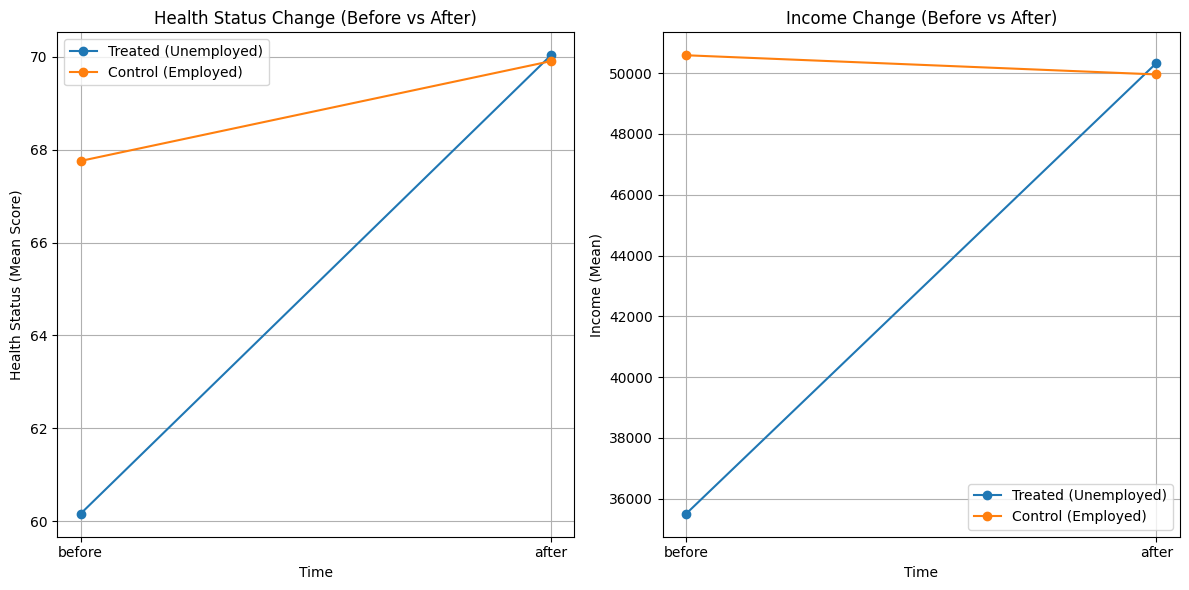

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/did_health_income_data_v2.csv'
data = pd.read_csv(file_path)

print(data.head())

# 건강 상태에 대한 그룹별 평균 계산
group_means_health = data.groupby(['group', 'time'])['health'].mean().unstack()

# 소득에 대한 그룹별 평균 계산
group_means_income = data.groupby(['group', 'time'])['income'].mean().unstack()

# 이중 차분 계산 - 건강
treated_diff_health = group_means_health.loc['treated', 'after'] - group_means_health.loc['treated', 'before']
control_diff_health = group_means_health.loc['control', 'after'] - group_means_health.loc['control', 'before']
did_health = treated_diff_health - control_diff_health

# 이중 차분 계산 - 소득
treated_diff_income = group_means_income.loc['treated', 'after'] - group_means_income.loc['treated', 'before']
control_diff_income = group_means_income.loc['control', 'after'] - group_means_income.loc['control', 'before']
did_income = treated_diff_income - control_diff_income

print("Treated group's health change (before vs after):", treated_diff_health)
print("Control group's health change (before vs after):", control_diff_health)
print("Difference-in-Differences (DiD) estimate - Health:", did_health)
print()
print("Treated group's income change (before vs after):", treated_diff_income)
print("Control group's income change (before vs after):", control_diff_income)
print("Difference-in-Differences (DiD) estimate - Income:", did_income)

# 시각화 - 건강 상태 변화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(['before', 'after'], group_means_health.loc['treated'], label='Treated (Unemployed)', marker='o')
plt.plot(['before', 'after'], group_means_health.loc['control'], label='Control (Employed)', marker='o')
plt.title('Health Status Change (Before vs After)')
plt.ylabel('Health Status (Mean Score)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)

# 시각화 - 소득 변화
plt.subplot(1, 2, 2)
plt.plot(['before', 'after'], group_means_income.loc['treated'], label='Treated (Unemployed)', marker='o')
plt.plot(['before', 'after'], group_means_income.loc['control'], label='Control (Employed)', marker='o')
plt.title('Income Change (Before vs After)')
plt.ylabel('Income (Mean)')
plt.xlabel('Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()